#### The zip folder contains the original jupyter notebook (.ipynb), which can be executed either on local jupyter or on this server. It also contains the data files (.txt) and exported LaTeX version of the notebook. I have made use of `numpy`, `matplotlib`, `math`, `scipy.optimize` and `scipy.stats` libraries in this notebook.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
from scipy.stats import norm
# Set up the non-linear curve fit
from scipy.optimize import curve_fit

# Dataset 1: Noisy Straight Line

In [37]:
def stline(x, m, c):
    return m * x + c

The `stline` function returns the y values for given x on the straight line $ y = mx + c$.

In [38]:
f = open("stline.txt", 'r')
inp = f.readlines()
f.close()
x = []
y = []

for line in inp:
    xyvals = line.split()
    x.append(float(xyvals[0]))
    y.append(float(xyvals[1]))
    
x = np.array(x)
y = np.array(y)

#print(type(x))

Here, we read in the data line by line from the .txt file and extract the x and y values into numpy arrays.

Below is the plot of the noisy data:

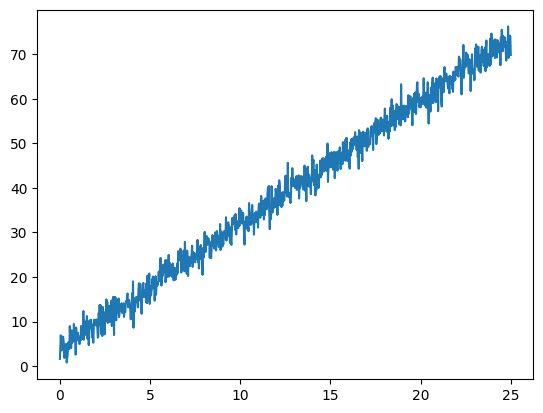

In [39]:
plt.plot(x, y)

We then use `lstsq` to perform linear regression to get the best fit straight line. We prefer `lstsq` over `curve_fit` because `lstsq` is specifically made for linear regression, whereas `curve_fit` is for any general non-linear curve. So, `lstsq` is more optimised for linear regression, and can be much faster and more efficient than `curve_fit` for linear regression.

We generate the input matrix for `lstsq` (basically , $Mp = y$) as follows:

In [40]:
# Use column_stack to put the vectors side by side
M = np.column_stack([x, np.ones(len(x))])
# print(y)
(p1, p2), _, _, _ = np.linalg.lstsq(M, y, rcond=None)
print(f"The estimated equation using lstsq is {p1} x + {p2}")
%timeit np.linalg.lstsq(M, y, rcond=None)

The estimated equation using lstsq is 2.791124245414918 x + 3.848800101430742
34.3 µs ± 2.63 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


We also compare the performance of `curve_fit` and `lstsq`:

In [41]:
(m, c), _ = curve_fit(stline, x, y)
print(f"The estimated equation using curve_fit is {m} x + {c}")
%timeit curve_fit(stline, x, y)

The estimated equation using curve_fit is 2.7911242448201588 x + 3.848800111263445
241 µs ± 8.66 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


As we can see, `curve_fit` and `lstsq` give almost the same values, but `curve_fit` runs almost 8 times slower than `lstsq`, since it is not optimised for linear regression. Hence, we prefer `lstsq` for this linear dataset.

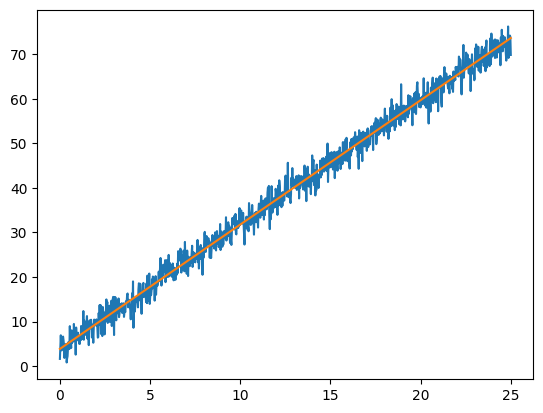

In [42]:
#plotting estimated equation
yest = stline(x, p1, p2)
plt.plot(x, y, x, yest)

As we can see, the line is a fairly good fit for the noisy data.

Below, I have plotted the same with errorbars:

<ErrorbarContainer object of 3 artists>

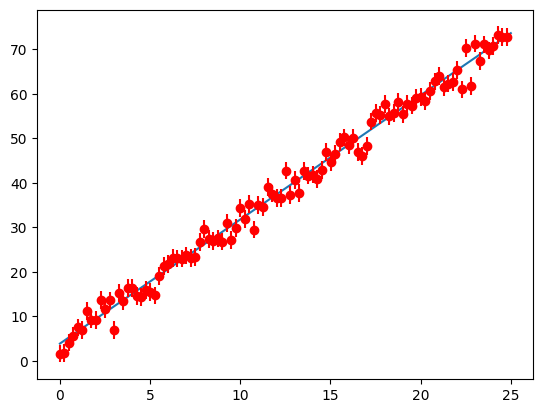

In [43]:
#plotting errorbars
yerror = np.std(yest - y)
plt.plot(x, yest)

plt.errorbar(x[::10], y[::10], yerr = yerror, fmt='ro')

# Data Set 2: Fourier Series

A Fourier series is an expansion of a periodic function $f(x)$ in terms of an infinite sum of sines and cosines of different harmonics.

In this dataset, we are given an approximated square wave formed using a truncated Fourier Series. We need to find the number of harmonics to use to fit this truncated series the best. This will form the basis of our model function for `curve_fit` this time. 

Firstly, we read in the data and plot it:

In [44]:
f = open("fourier.txt", 'r')
inp = f.readlines()
f.close()
x = []
y = []

for line in inp:
    xyvals = line.split()
    x.append(float(xyvals[0]))
    y.append(float(xyvals[1]))
    
x = np.array(x)
y = np.array(y)

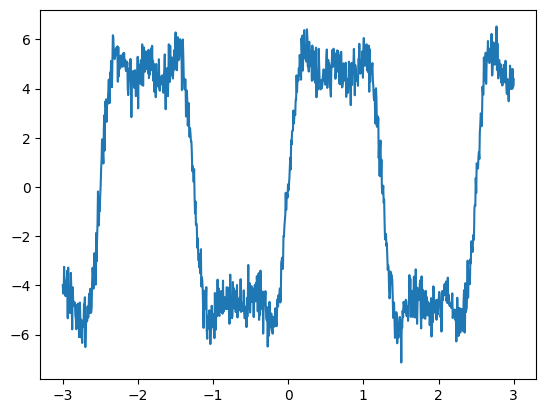

In [45]:
plt.plot(x, y)

As we can see, the data is a fourier series reperesentation of a square wave with some finite number of harmonics (due to which it is not a perfect square wave). Our job is to find the number of harmonics to use to fit this distorted square wave perfectly.

For this, we define a function `harmonics`, which takes as input the x value, (half the) time period and a scaling factor (by trial and error, the regression works better when this scaling factor is included), and returns the y value (square wave value). It does this by adding a pre-specified number of harmonics (given by `n`).

We prefer non linear `curve_fit` over linear curve fitting, since we can see from the above plotted data that the given points do not lie on a single straight line. They clearly lie on some periodic square wave, and so we use non linear `curve_fit`.

In [46]:
def harmonics(x, L, a):
    sum = 0
    for i in range(n): 
        sum += (np.sin(((2*i+1)*np.pi*x)/L))/(2*i+1) # n is the number of harmonics
    return(a*(sum*4)/np.pi)

We then use `curve_fit` to get the estimated Fourier series by varying the number of harmonics used from 1 to 6. Each time, we call the `curve_fit` function to fit the L (wavelength) and a (amplitude) parameters to the given dataset, and plot the resultant best fit curve.

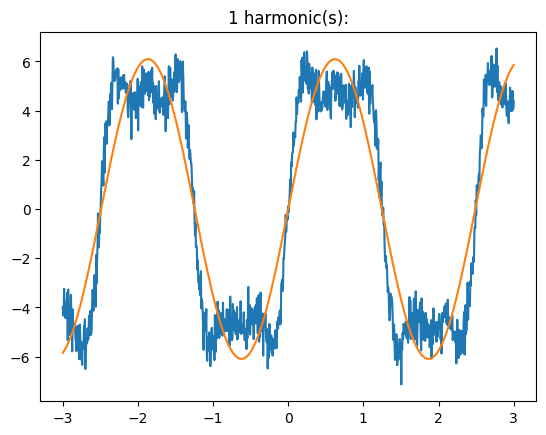

L1 : 1.2448266475616065
a1 : 4.784329316731778


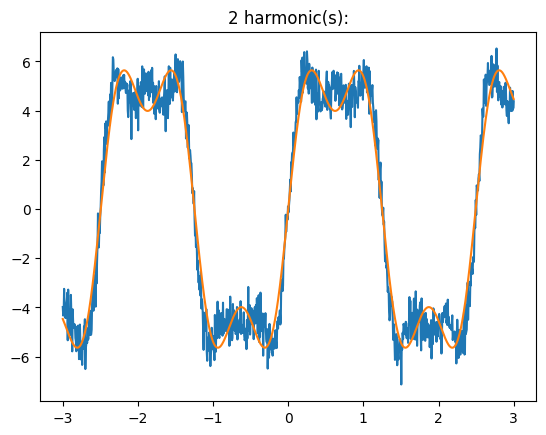

L2 : 1.2473976512294855
a2 : 4.695927291151042


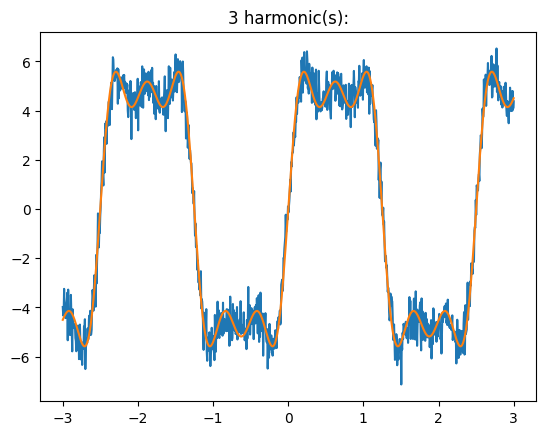

L3 : 1.2506520750048318
a3 : 4.695620880497233


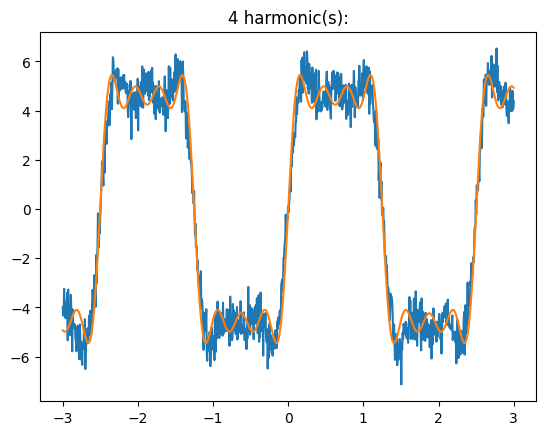

L4 : 1.2514523174697756
a4 : 4.597640110811965


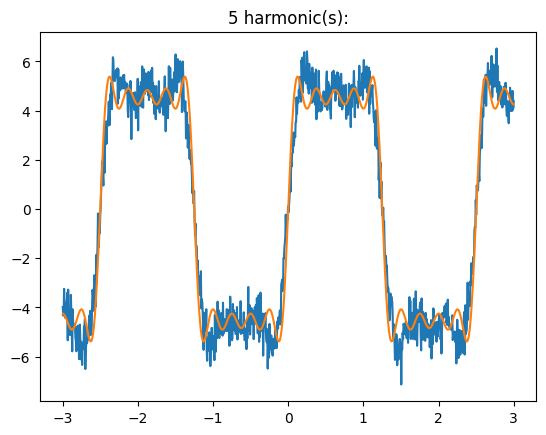

L5 : 1.2510934077117413
a5 : 4.550873029658773


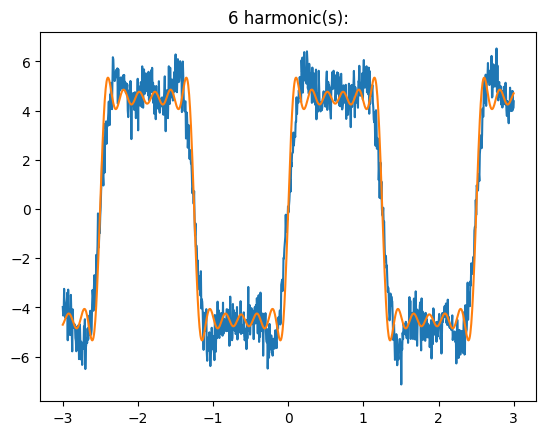

L6 : 1.251475946678256
a6 : 4.5197342460264265


In [47]:
for n in range(1, 7):
    (L, a) , _ = curve_fit(harmonics, x, y)
    yest = harmonics(x, L, a)
    plt.title(f"{n} harmonic(s):")
    plt.plot(x, y, x, yest)
    plt.show()
    print(f'''L{n} : {L}
a{n} : {a}''')

As we can see from the above plots, we get the best fit Fourier series for the given dataset when we use 3 harmonics. Thus, for the remaining calculations, we only use the values from the 3-harmonic case.

Assuming the x - axis to be the time axis, the frequency will be:

$$
    f = \frac{1}{\text{Time period}} = \frac{1}{2L}
$$

Thus, using the value $L3 : 1.2506520750048318$ from above, we get:

In [48]:
l3 = 1.2506520750048318
frequency3 = 1/l3
print(f'Frequency of 3 harmonic Fourier Series: {frequency3} Hz')

Frequency of 3 harmonic Fourier Series: 0.7995828895867275 Hz


To estimate the coefficients, we define a new function called `coeff` which takes as input the x value and the 3 coefficients of the 3 harmonics, and returns the value of the Fourier series at that point.

In [49]:
# Estimating the coefficients
def coeff(x, a1, a2, a3):
    sum = a1* (np.sin(((2*0+1)*np.pi*x)/L))/(2*0+1) + a2* (np.sin(((2*1+1)*np.pi*x)/L))/(2*1+1) + a3* (np.sin(((2*2+1)*np.pi*x)/L))/(2*2+1)
    return((sum*4)/np.pi)

Using `curve_fit` to regress for the best fit values of the Fourier coefficients:

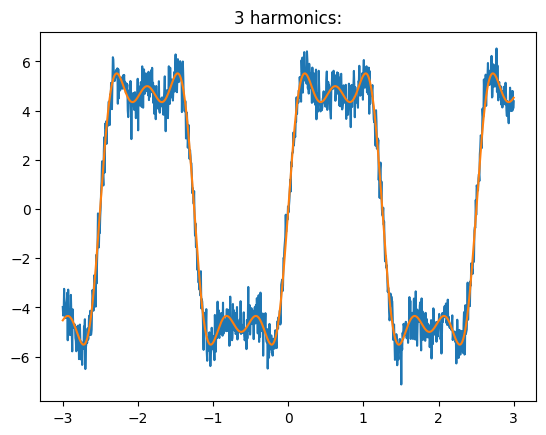

In [50]:
(a1, a2, a3) , _ = curve_fit(coeff, x, y)
yest = coeff(x, a1, a2, a3)
plt.title(f"3 harmonics:")
plt.plot(x, y, x, yest)
plt.show()

In [51]:
print(f'''The values of the Fourier coefficients are:
a1 : {a1} for first harmonic
a2 : {a2} for second harmonic
a3 : {a3} for third harmonic''')

The values of the Fourier coefficients are:
a1 : 4.720935977796759 for first harmonic
a2 : 4.71447154683033 for second harmonic
a3 : 3.8626741987585893 for third harmonic


We now plot the errorbars for the noisy data:

<ErrorbarContainer object of 3 artists>

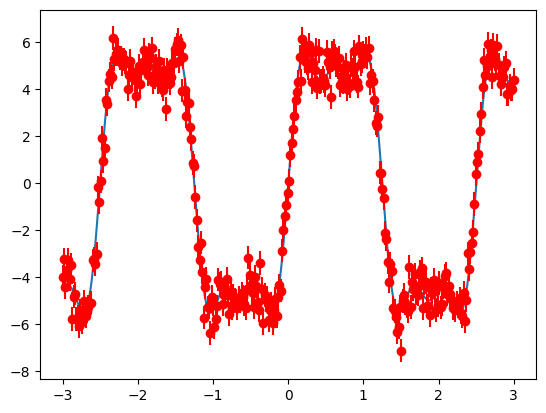

In [52]:
#plotting errorbars
yerror = np.std(yest - y)
plt.plot(x, yest)

plt.errorbar(x[::3], y[::3], yerr = yerror, fmt='ro')

# Dataset 3: Planck's Law

First, we define some constants, namely $K_{B}$ (Boltzmann constant) and $c$ (speed of light)

In [53]:
KB = 1.38e-23
C = 3.0e8

Next, we read the data line by line from the file and plot it:

In [54]:
f = open("planck.txt", 'r')
inp = f.readlines()
f.close()
x = []
y = []

for line in inp:
    xyvals = line.split()
    x.append(float(xyvals[0]))
    y.append(float(xyvals[1]))
    
x = np.array(x)
y = np.array(y)

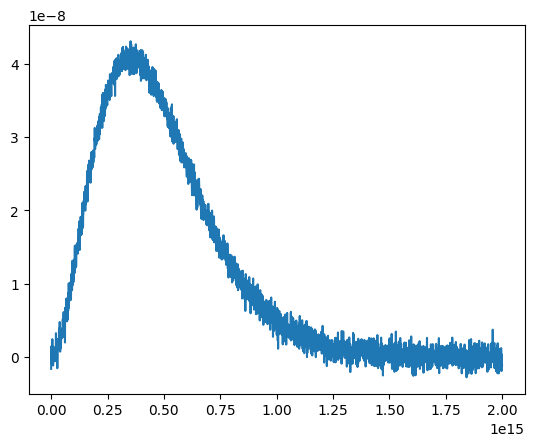

In [55]:
plt.plot(x, y)

We now define a function `plancklaw` that takes as input the frequency and returns the spectral radiance at that frequency. This function acts as the input function for `curve_fit` as well.

In [56]:
def plancklaw(f, h, t):
    f1 = (2*h*f*f*f)/(C*C)
    f2 = 1.0/(np.exp((h*f)/(KB*t)) - 1)
    return(f1*f2)

We now call the non-linear `curve_fit` function from the `scipy.optimize` library. We use the `plancklaw` function we defined above as the model function used for fitting. 

We also specify the initial guess for the values. This helps prevent `overflow error` in calculation.

In [57]:
(h, t), _ = curve_fit(plancklaw, x, y, p0 = [1e-34,  300])

print(f"Estimated T = {t}, Planck's constant = {h}")

Estimated T = 6011.36151290063, Planck's constant = 6.643229745132031e-34


We now plot the noisy data and superpose our estimated non-linear function on top of it.

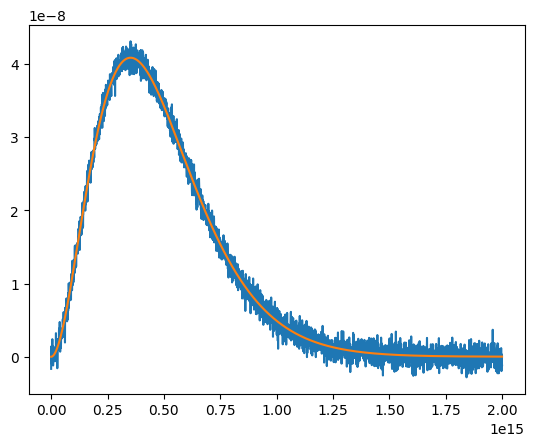

In [58]:
yest = plancklaw(x, h, t)
plt.plot(x, y, x, yest)

Thus, the estimated values from the above curve fitting are:
$$ Temperature : 6011.36151290063 K$$
$$\text{Planck's constant} = 6.643229745132031 \times 10^{-34} J-sec $$

We now plot the errorbars for the noisy data:

<ErrorbarContainer object of 3 artists>

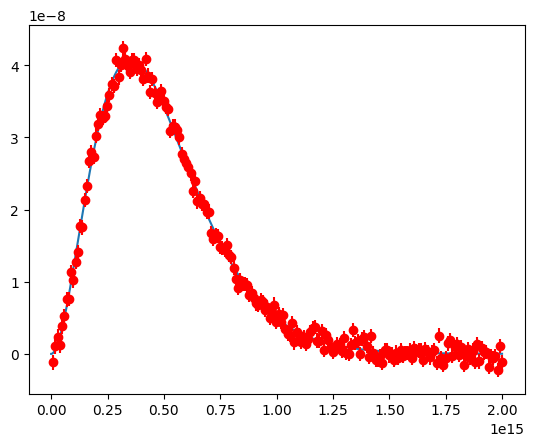

In [59]:
#plotting errorbars
yerror = np.std(yest - y)
plt.plot(x, yest)

plt.errorbar(x[::15], y[::15], yerr = yerror, fmt='ro')

# Dataset 4: Unknown

We begin by reading the data and line-plotting it:

In [60]:
f = open("unknowndata.txt", 'r')
inp = f.readlines()
f.close()
x = []
y = []

for line in inp:
    xyvals = line.split()
    x.append(float(xyvals[0]))
    y.append(float(xyvals[1]))
    
x = np.array(x)
y = np.array(y)

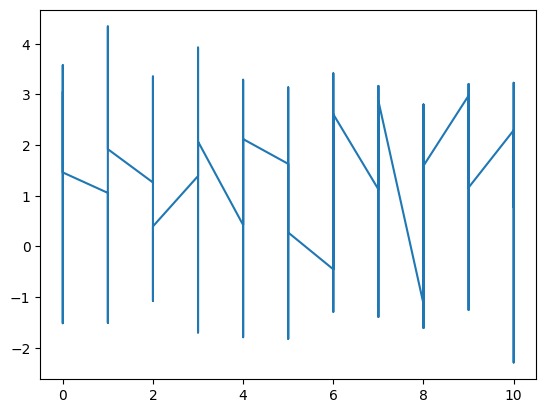

In [61]:
plt.plot(x, y)

We also scatter plot the data to get a better understanding of the density / distribution of the individual data points in the set:

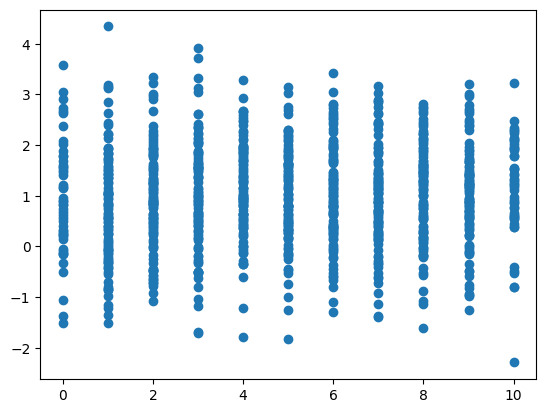

In [62]:
plt.scatter(x, y)

We now increase the transparency of the dots, to get a better idea of the density of the data points:

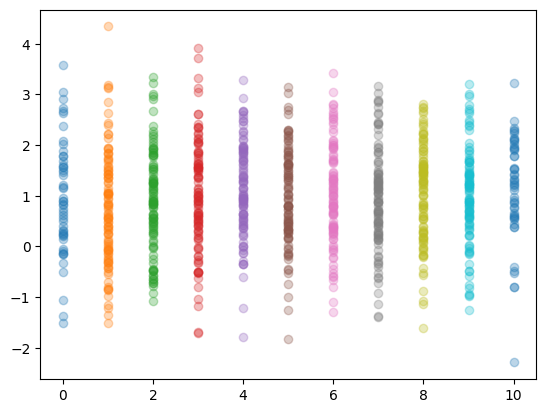

In [63]:
for j in range(11):
    q = []
    for i in range(len(x)):
        if x[i] == j:
            q.append(y[i])
    q = np.array(q)
    qsort = np.sort(q)
    # (mean, std, amp), _ = curve_fit(erffunc, qsort, np.arange(0, 1, 1/len(qsort)))
    # finaldata = erffunc(qsort, mean, std, amp)
    plt.scatter([j for i in range(len(qsort))], qsort, alpha = 0.3)

From the above steps, it is clear that all the given data follows some sort of distribution which is very dense in the centre and fades out at the edges. This hints at probability density curves, like maybe a Gaussian curve. To further verify our intuition, we plot the data (arranged in ascending order) for each individual x as follows:

In [64]:
# to find number of terms for each x
for i in range(11):
    print(np.count_nonzero(x == i))

50
100
100
100
100
100
100
100
100
100
50


Below, I have plotted the datapoints corresponding to each x value, to see the distribution of the data points for each x value:

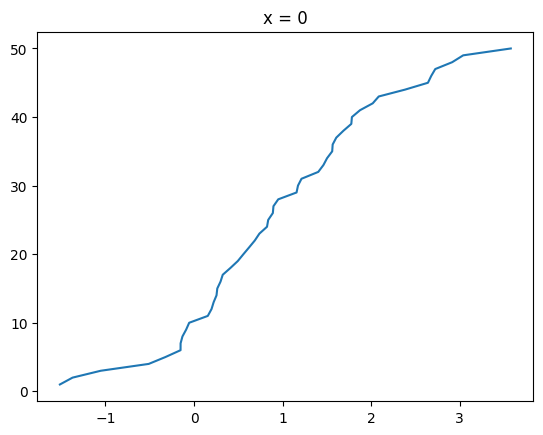

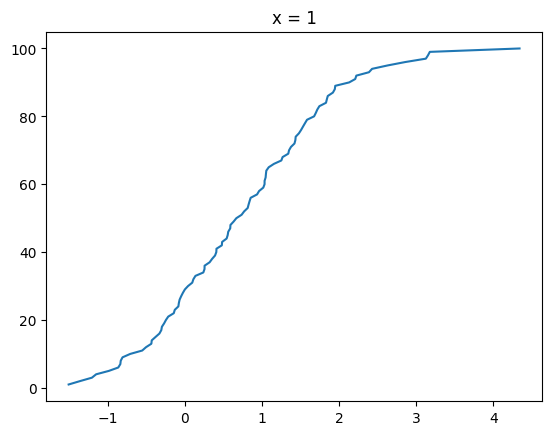

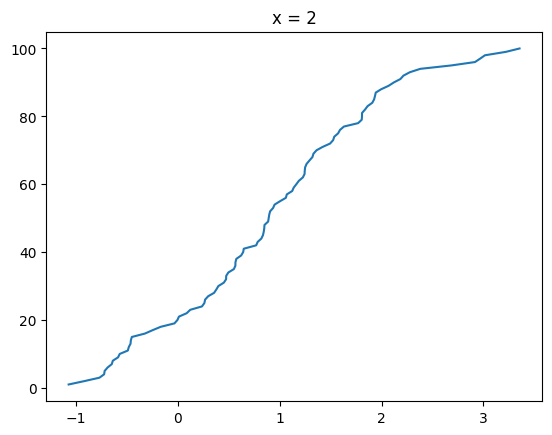

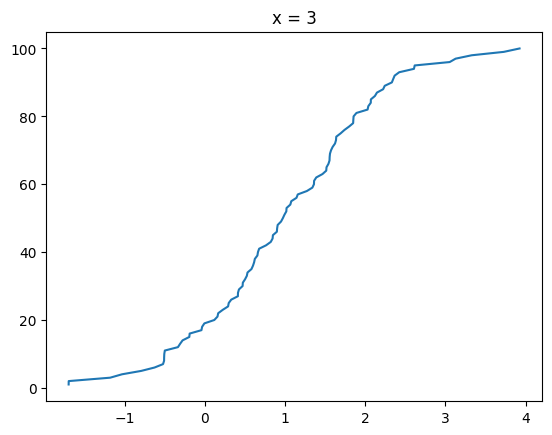

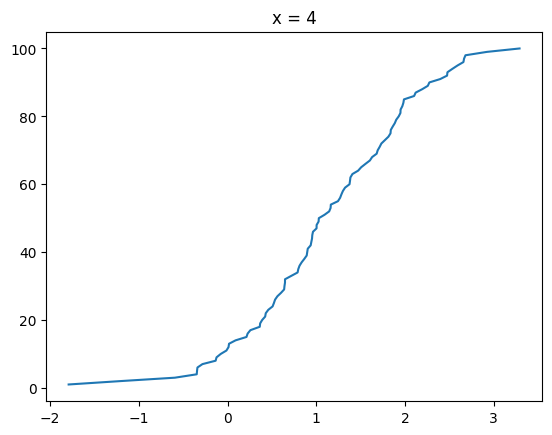

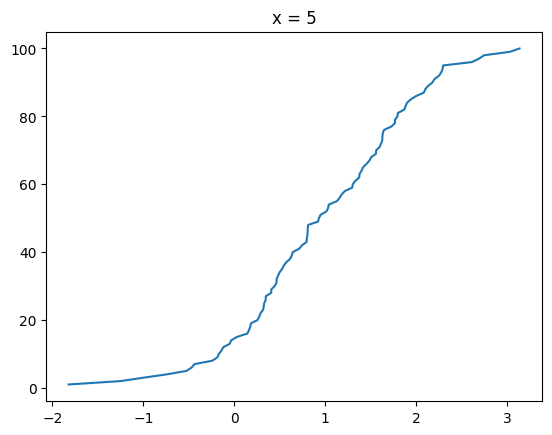

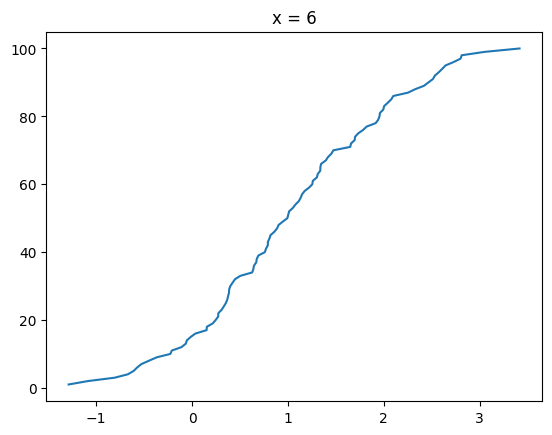

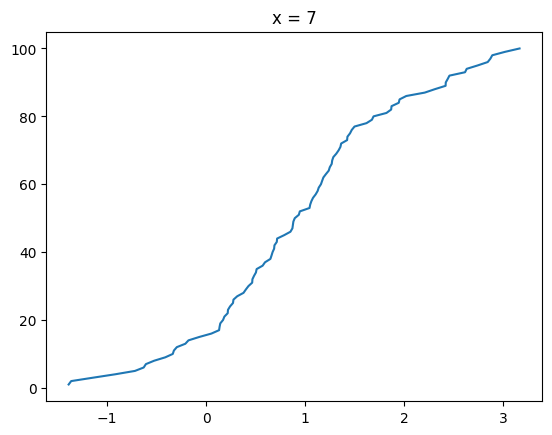

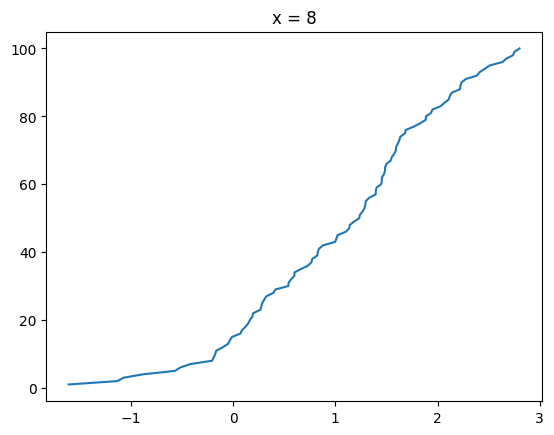

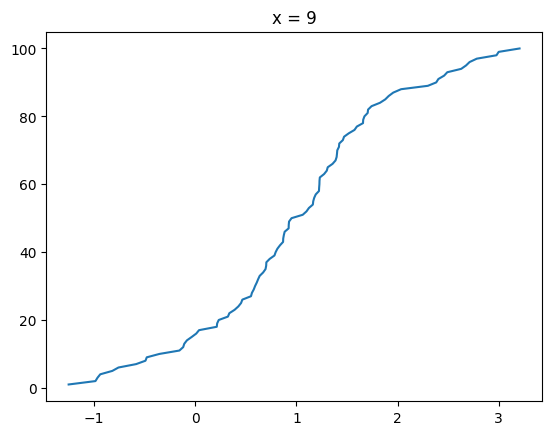

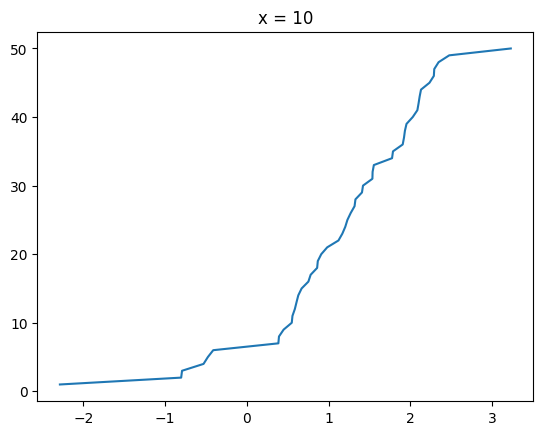

In [65]:
for j in range(11):
    q = []
    for i in range(len(x)):
        if x[i] == j:
            q.append(y[i])
    q = np.array(q)
    qsort = np.sort(q)
    plt.title(f"x = {j}")
    plt.plot(qsort, np.arange(1, len(qsort)+1, 1))
    plt.show()

This data resembles an erf function, so we try to fit erf curves to each of the individual x's data points.

For this, we define the model function for `curve_fit` as `erffunc`, which returns the erf value of the given x - point.

In [66]:
def erffunc(qsort, mean, stddev, amplitude):
    return(amplitude*norm.cdf((qsort - mean)/stddev))

We then fit the erf curves for each of the x datasets using `curve_fit`. We use regression to find out the values of the mean and standard deviation of the dataset, and use the computed values to generate our erf function.

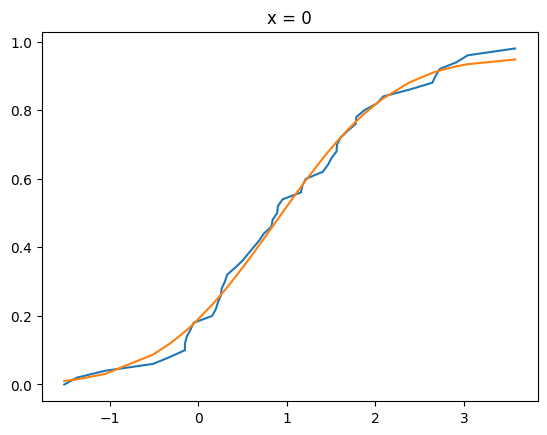

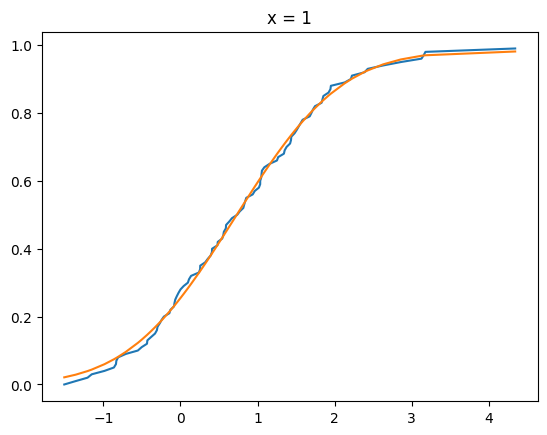

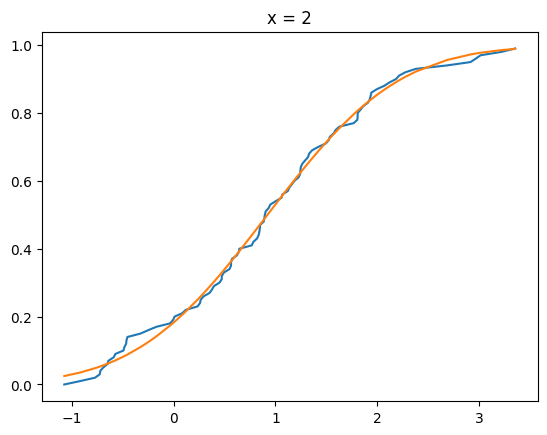

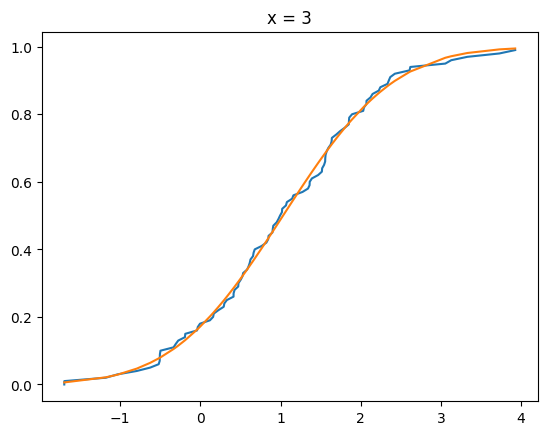

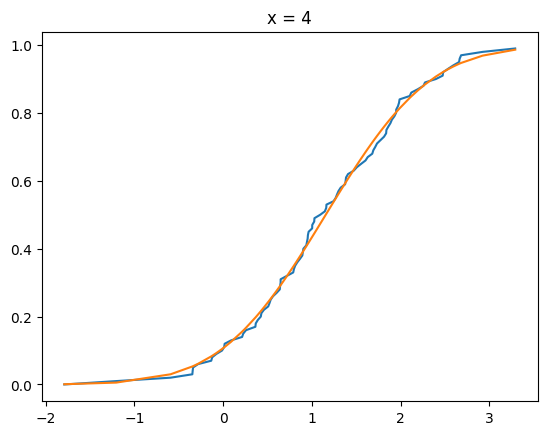

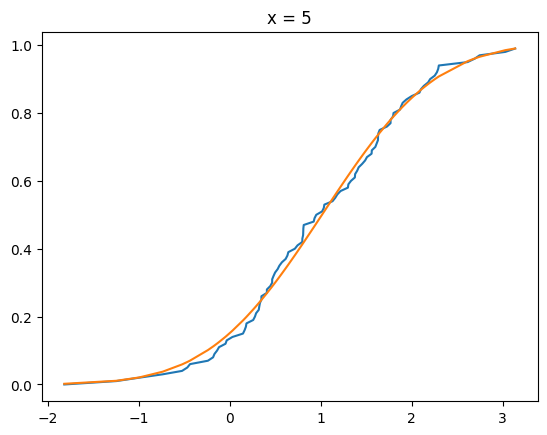

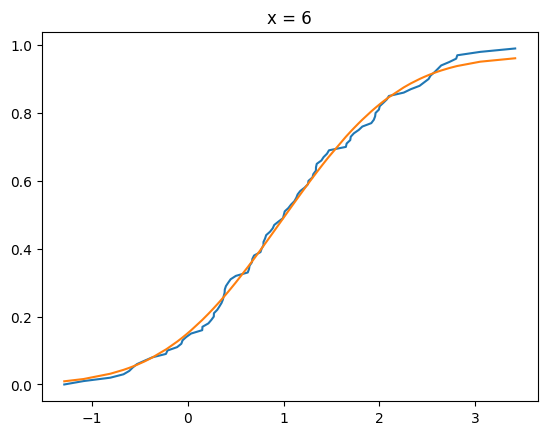

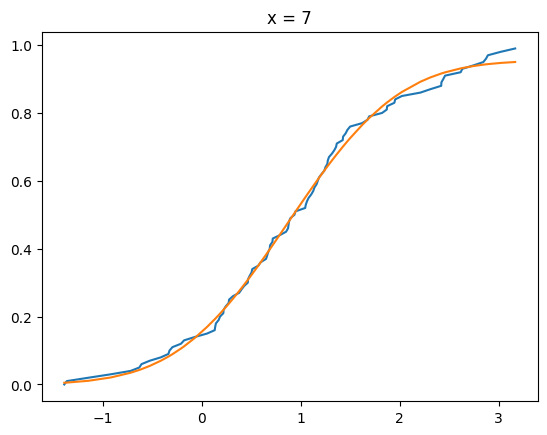

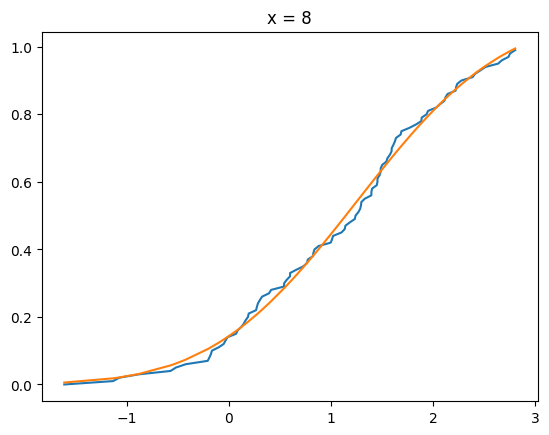

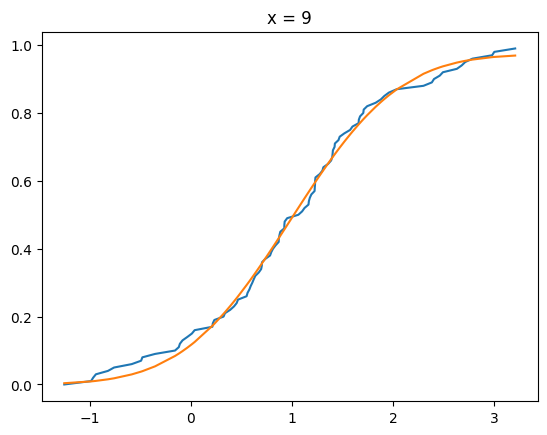

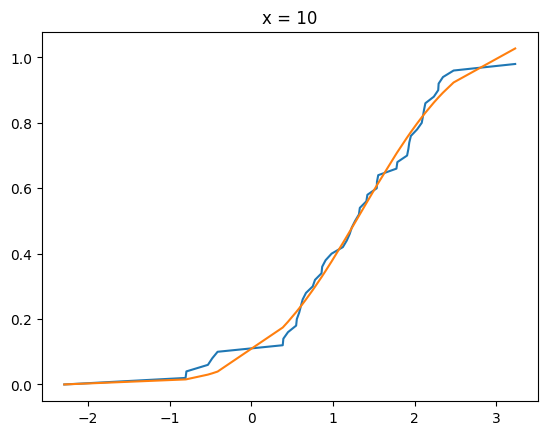

In [67]:
for j in range(11):
    q = []
    for i in range(len(x)):
        if x[i] == j:
            q.append(y[i])
    q = np.array(q)
    qsort = np.sort(q)
    (mean, std, amp), _ = curve_fit(erffunc, qsort, np.arange(0, 1, 1/len(qsort)))
    finaldata = erffunc(qsort, mean, std, amp)
    # print(finaldata)
    plt.title(f"x = {j}")
    plt.plot(qsort, np.arange(0, 1, 1/len(qsort)), qsort, finaldata)
    plt.show()

As we can see, the erf curves fit the given data fairly well. Thus, this is the curve fit we choose for the given unknown dataset. (I was also considering tan inverse as a possibility, but seeing how well erf fits the data, I will not be exploring that possibility)

After finding the mean and standard deviation through `curve_fit`, we can gain more insight by plotting the probability density function of each dataset. We can see that our initial guess of a Gaussian curve was right. 

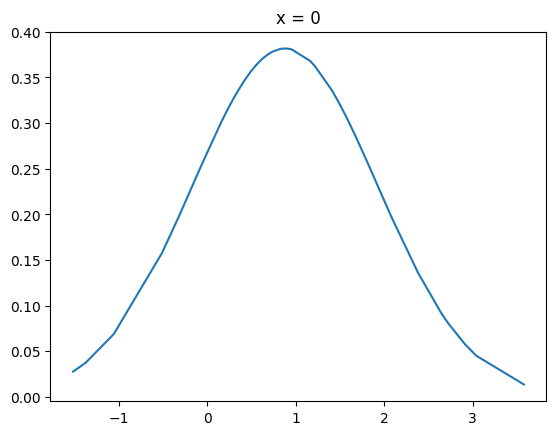

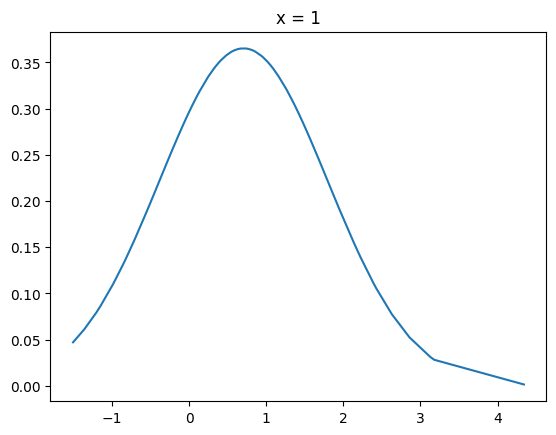

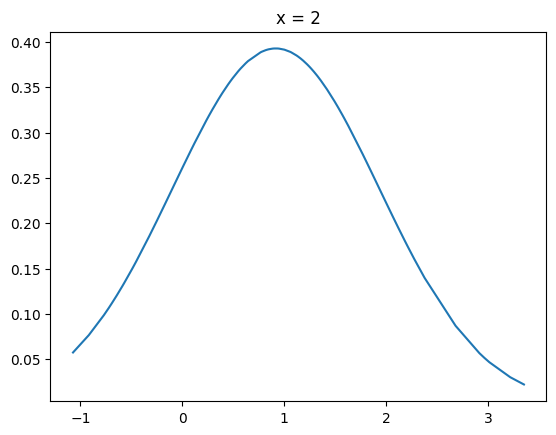

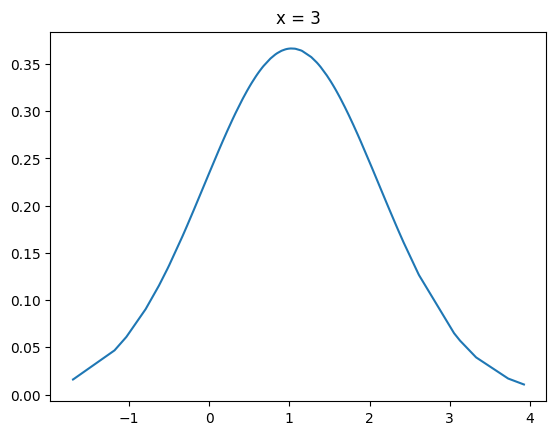

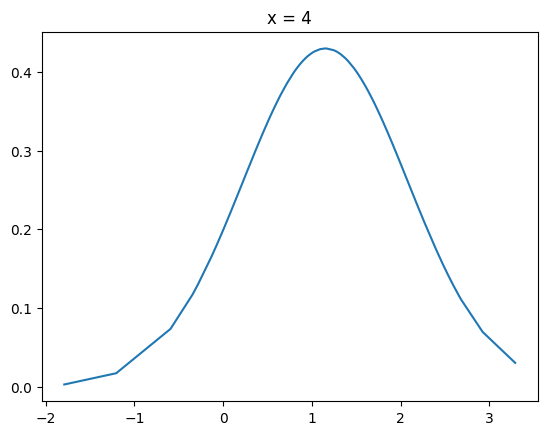

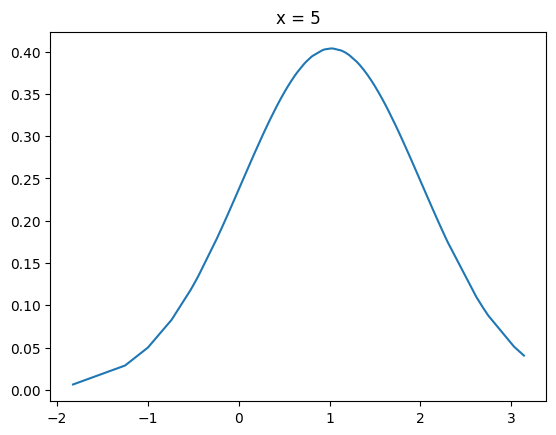

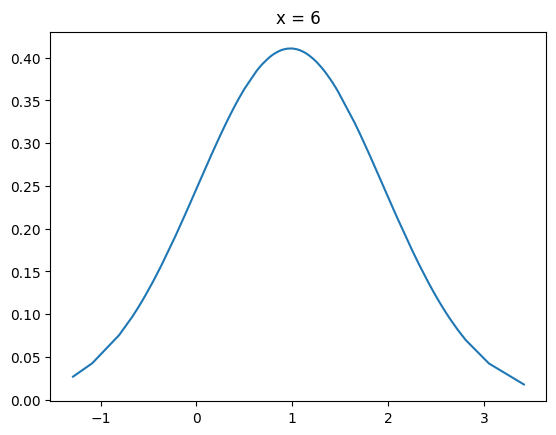

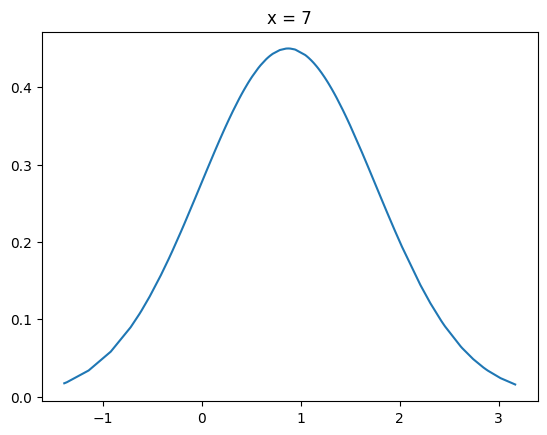

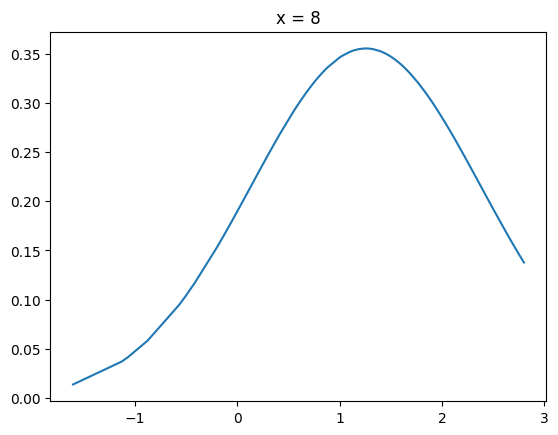

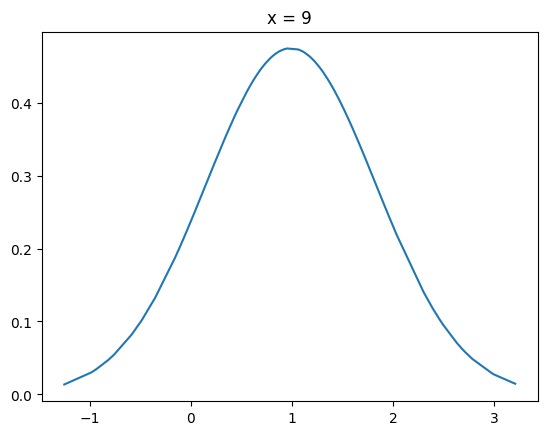

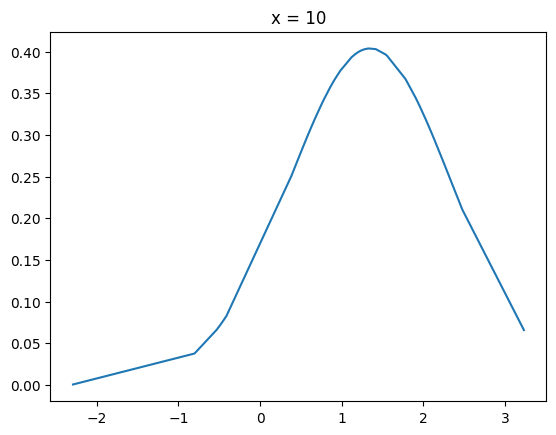

In [68]:
for j in range(11):
    q = []
    for i in range(len(x)):
        if x[i] == j:
            q.append(y[i])
    q = np.array(q)
    qsort = np.sort(q)
    (mean, std, amp), _ = curve_fit(erffunc, qsort, np.arange(0, 1, 1/len(qsort)))
    finaldata = erffunc(qsort, mean, std, amp)
    plt.title(f"x = {j}")
    plt.plot(qsort, norm.pdf(qsort, mean, std))
    plt.show()

We finally plot a transparent scatter plot of our final erf functions:

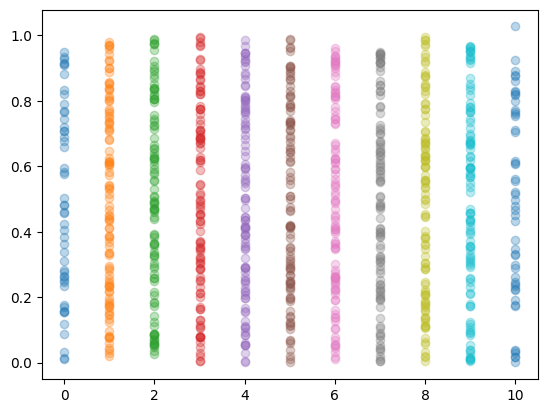

In [69]:
for j in range(11):
    q = []
    for i in range(len(x)):
        if x[i] == j:
            q.append(y[i])
    q = np.array(q)
    qsort = np.sort(q)
    (mean, std, amp), _ = curve_fit(erffunc, qsort, np.arange(0, 1, 1/len(qsort)))
    finaldata = erffunc(qsort, mean, std, amp)
    plt.scatter([j for i in range(len(qsort))], finaldata, alpha = 0.3)
    
plt.show()